In [2]:
!pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

## download dataset 
!kaggle datasets download -d arshid/iris-flower-dataset

## unzip dataset
!unzip "iris-flower-dataset.zip" -d "iris_dataset"

     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=9199db9cbfbd090b4566cdf197274bfcdd03fda1259b3ba522e4f96d4ee5205a
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/0.99k [00:00<?, ?B/s]
100% 0.99k/0.99k [00:00<00:00, 695kB/s]
Archive:  iris-flower-dataset.zip
  inflating: iris_dataset/IRIS.csv   


## Importing Libraries


In [46]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

## feature scalling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

## EDA

In [47]:
iris_data = pd.read_csv('/content/iris_dataset/IRIS.csv')
print("****************")
print(f"Shape of the dataset :- {iris_data.shape}")
print("\n***********\n")
print(f"Sample Dataset :- \n {iris_data.head()}")
print("\n***********\n")
print(f"Checking for whether null values present or not :- \n{iris_data.isnull().sum()}")

print(f"Duplicate values :- {len(iris_data.loc[iris_data.duplicated()])}")

## remove duplicate values
iris_data = iris_data.drop_duplicates()
print("\n***********\n")
print(f"Target value counts :- \n {iris_data['species'].value_counts()}")

****************
Shape of the dataset :- (150, 5)

***********

Sample Dataset :- 
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

***********

Checking for whether null values present or not :- 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Duplicate values :- 3

***********

Target value counts :- 
 Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64


## Visualize

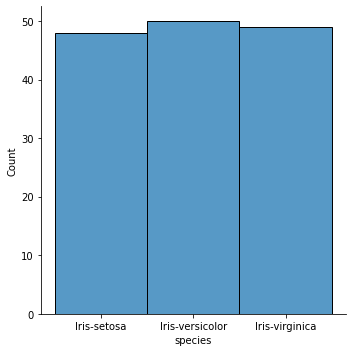

In [13]:
sns.displot(iris_data['species'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


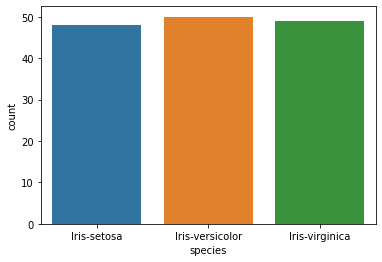

In [14]:
sns.countplot(iris_data['species'])

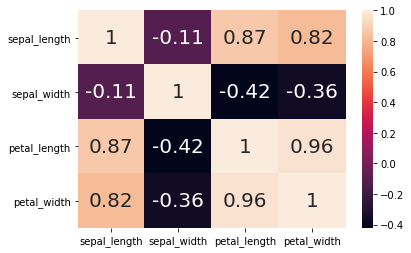

In [19]:
## heat map
sns.heatmap(iris_data.corr(), annot=True, annot_kws={'size':20})

## Preprocessing

In [48]:
## separate independent and dependent variables

X = iris_data.drop(['species'], axis=1)
y = iris_data['species']

## creating pipeline for applying standard scaler on x dataset
pipe_line = Pipeline([
                      ('std_scaler', StandardScaler())
])

## transform X values 
X = pipe_line.fit_transform(X)

## initialize label encoder
label_encode = LabelEncoder()
## transform y values with label encoder
y = label_encode.fit_transform(y)

print(f"Labels list from label encoder :- {list(label_encode.classes_)}")


## split whole dataset into train and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Size Of The Train Dataset :- {len(X_train)}")
print(f"Size Of The Test Dataset :- {len(X_test)}")

Labels list from label encoder :- ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Size Of The Train Dataset :- 132
Size Of The Test Dataset :- 15


## Mode Building

In [60]:
## initialize svm for classification problem
svc_clf = SVC(C=0.5, kernel='linear')

## build SVC model 
svc_clf.fit(X_train, y_train)

## prediction on x_test
predict_result = svc_clf.predict(X_test)

## Calculate accuracy value
accuracy = accuracy_score(y_test, predict_result)
print(f"Iris classificication Accuracy :- {accuracy}\n")

## calcuate confusion matrix
Confusion_matric = confusion_matrix(y_test, predict_result)
print(f"Confusion matrix :- \n {Confusion_matric}\n")

## calculate recall, precision and f1-score
clf_report = classification_report(y_test, predict_result)
print(f"Classification Report :- \n {clf_report}")

Iris classificication Accuracy :- 0.9333333333333333

Confusion matrix :- 
 [[5 0 0]
 [0 4 1]
 [0 0 5]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

